In [1]:
#!pip install lazypredict
#!pip install chart_studio
#!pip install squarify
import pandas as pd
import numpy as np
import matplotlib.pylab as plt
import seaborn as sns
import random
import matplotlib
import scipy.stats as stats
%matplotlib inline 
sns.set()
from pandas_profiling import ProfileReport
import math
import re
import chart_studio.plotly as py
import plotly.offline as py
from plotly.offline import iplot
from plotly.offline import download_plotlyjs,init_notebook_mode,plot,iplot
from plotly.offline import init_notebook_mode, iplot
init_notebook_mode(connected=True)
import plotly.express as px
from plotly import tools
import plotly.tools as tls
import plotly.graph_objs as go
import squarify
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.model_selection import train_test_split
from sklearn import model_selection
from lazypredict.Supervised import LazyClassifier
from xgboost import XGBClassifier
from sklearn.ensemble import BaggingClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.svm import SVC
from sklearn.ensemble import GradientBoostingClassifier
from sklearn.ensemble import AdaBoostClassifier
from sklearn.linear_model import SGDClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import cross_val_score
from sklearn.metrics import classification_report
from sklearn.metrics import accuracy_score
from sklearn.preprocessing import LabelEncoder
from sklearn.preprocessing import OrdinalEncoder
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import StandardScaler
from sklearn.impute import SimpleImputer
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline

C:\Users\elena\anaconda3\lib\site-packages\sklearn\utils\deprecation.py:143: FutureWarning:

The sklearn.utils.testing module is  deprecated in version 0.22 and will be removed in version 0.24. The corresponding classes / functions should instead be imported from sklearn.utils. Anything that cannot be imported from sklearn.utils is now part of the private API.



**EXPLORATORY DATA ANALYSIS**

In [2]:
obesity_df = pd.read_csv('ObesityDataSet.csv')

In [3]:
obesity_df

,Gender,Age,Height,Weight,family_history_with_overweight,FAVC,FCVC,NCP,CAEC,SMOKE,CH2O,SCC,FAF,TUE,CALC,MTRANS,NObeyesdad
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,1.71,131.41,yes,yes,3.00,3.00,Sometimes,no,1.73,no,1.68,0.91,Sometimes,Public_Transportation,Obesity_Type_III
2107,Female,21.98,1.75,133.74,yes,yes,3.00,3.00,Sometimes,no,2.01,no,1.34,0.60,Sometimes,Public_Transportation,Obesity_Type_III
2108,Female,22.52,1.75,133.69,yes,yes,3.00,3.00,Sometimes,no,2.05,no,1.41,0.65,Sometimes,Public_Transportation,Obesity_Type_III
2109,Female,24.36,1.74,133.35,yes,yes,3.00,3.00,Sometimes,no,2.85,no,1.14,0.59,Sometimes,Public_Transportation,Obesity_Type_III


- Gender: Male/Female
-Age
- Height (m)
- Weight (kg)
- Family history with overweight: yes/no
- FAVC (frequent consumption of high caloric food): yes/no
- FCVC (frequency of consumption of vegetables): 1=never, 2=sometimes, 3=always
- NCP (number of main meals): 1, 2, 3 or 4 meals a day
- CAEC (consumption of food between meals): 1=no, 2=sometimes, 3=frequently, 4=always
- Smoke: yes/no
- CH20 (consumption of water daily in liters): 1 = less than a liter, 2 = 1–2 liters, 3 = more than 2 liters
- SCC (calories consumption monitoring): yes/no
- FAF (physical activity frequency in days): 0 = none, 1 = 1 to 2 days, 2= 2 to 4 days, 3 = 4 to 5 days
- TUE (time using technology devices in hours): 0 = 0–2 hours, 1 = 3–5 hours, 2 = more than 5 hours
- CALC (consumption of alcohol): 1= never, 2 = sometimes, 3 = frequently, 4 = always
- MTRANS (transportation used): public transportation/automobile/walking/motorbike/bike
- NObeyesdad (obesity Level): Insufficient_Weight/Normal_Weight/Overweight_Level_I/Overweight_Level_II/ Obesity_Type_I/Obesity_Type_II/Obesity_Type_III

In [4]:
#Rename columns
obesity_df = obesity_df.rename(columns={"FAVC": "frequent_consumption_of_high_caloric_food", 
                                  'FCVC': 'frequency_of_consumption_of_vegetables',
                                  'NCP': 'number_of_main_meals',
                                  'CAEC': 'consumption_of_food_between_meals',
                                  'SMOKE': 'smoke',
                                  'CH2O': 'consumption_of_water_daily',
                                  'SCC': 'calories_consumption_monitoring',
                                  'FAF': 'physical_activity_frequency',
                                  'TUE': 'time_using_technology_devices',
                                  'CALC': 'consumption_of_alcohol',
                                  'MTRANS': 'transportation_used',
                                  'NObeyesdad': 'obesity_level'})
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,Female,21.00,1.62,64.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,0.00,1.00,no,Public_Transportation,Normal_Weight
1,Female,21.00,1.52,56.00,yes,no,3.00,3.00,Sometimes,yes,3.00,yes,3.00,0.00,Sometimes,Public_Transportation,Normal_Weight
2,Male,23.00,1.80,77.00,yes,no,2.00,3.00,Sometimes,no,2.00,no,2.00,1.00,Frequently,Public_Transportation,Normal_Weight
3,Male,27.00,1.80,87.00,no,no,3.00,3.00,Sometimes,no,2.00,no,2.00,0.00,Frequently,Walking,Overweight_Level_I
4,Male,22.00,1.78,89.80,no,no,2.00,1.00,Sometimes,no,2.00,no,0.00,0.00,Sometimes,Public_Transportation,Overweight_Level_II


In [5]:
obesity_df.shape

(2111, 17)

In [6]:
#Check missing values
obesity_df.isna().sum()

Gender                                       0
Age                                          0
Height                                       0
Weight                                       0
family_history_with_overweight               0
frequent_consumption_of_high_caloric_food    0
frequency_of_consumption_of_vegetables       0
number_of_main_meals                         0
consumption_of_food_between_meals            0
smoke                                        0
consumption_of_water_daily                   0
calories_consumption_monitoring              0
physical_activity_frequency                  0
time_using_technology_devices                0
consumption_of_alcohol                       0
transportation_used                          0
obesity_level                                0
dtype: int64

In [7]:
#Data type
obesity_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2111 entries, 0 to 2110
Data columns (total 17 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2111 non-null   object 
 1   Age                                        2111 non-null   float64
 2   Height                                     2111 non-null   float64
 3   Weight                                     2111 non-null   float64
 4   family_history_with_overweight             2111 non-null   object 
 5   frequent_consumption_of_high_caloric_food  2111 non-null   object 
 6   frequency_of_consumption_of_vegetables     2111 non-null   float64
 7   number_of_main_meals                       2111 non-null   float64
 8   consumption_of_food_between_meals          2111 non-null   object 
 9   smoke                                      2111 non-null   object 
 10  consumption_of_water_dai

In [8]:
#Variables transformation
obesity_df['Height'] = obesity_df['Height']*100
obesity_df[['frequency_of_consumption_of_vegetables']] = obesity_df[['frequency_of_consumption_of_vegetables']].astype(int)
obesity_df[['number_of_main_meals']] = obesity_df[['number_of_main_meals']].astype(int)
obesity_df[['physical_activity_frequency']] = obesity_df[['physical_activity_frequency']].astype(int)
obesity_df[['consumption_of_water_daily']] = obesity_df[['consumption_of_water_daily']].astype(int)
obesity_df[['time_using_technology_devices']] = obesity_df[['time_using_technology_devices']].astype(int)
obesity_df['transportation_used'] = obesity_df['transportation_used'].apply(lambda x: x.replace('_', ' '))
obesity_df['obesity_level'] = obesity_df['obesity_level'].apply(lambda x: x.replace('_', ' '))

In [9]:
obesity_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,Female,21.00,162.00,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.00,152.00,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.00,180.00,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.00,180.00,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.00,178.00,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


In [10]:
obesity_df.dtypes.value_counts()

object     9
int32      5
float64    3
dtype: int64

In [11]:
#Statistical data
obesity_df.describe()

,Age,Height,Weight,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_water_daily,physical_activity_frequency,time_using_technology_devices
count,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00,2111.00
mean,24.31,170.17,86.59,2.21,2.52,1.71,0.73,0.38
std,6.35,9.33,26.19,0.60,0.83,0.60,0.83,0.58
min,14.00,145.00,39.00,1.00,1.00,1.00,0.00,0.00
25%,19.95,163.00,65.47,2.00,2.00,1.00,0.00,0.00
50%,22.78,170.05,83.00,2.00,3.00,2.00,1.00,0.00
75%,26.00,176.85,107.43,3.00,3.00,2.00,1.00,1.00
max,61.00,198.00,173.00,3.00,4.00,3.00,3.00,2.00


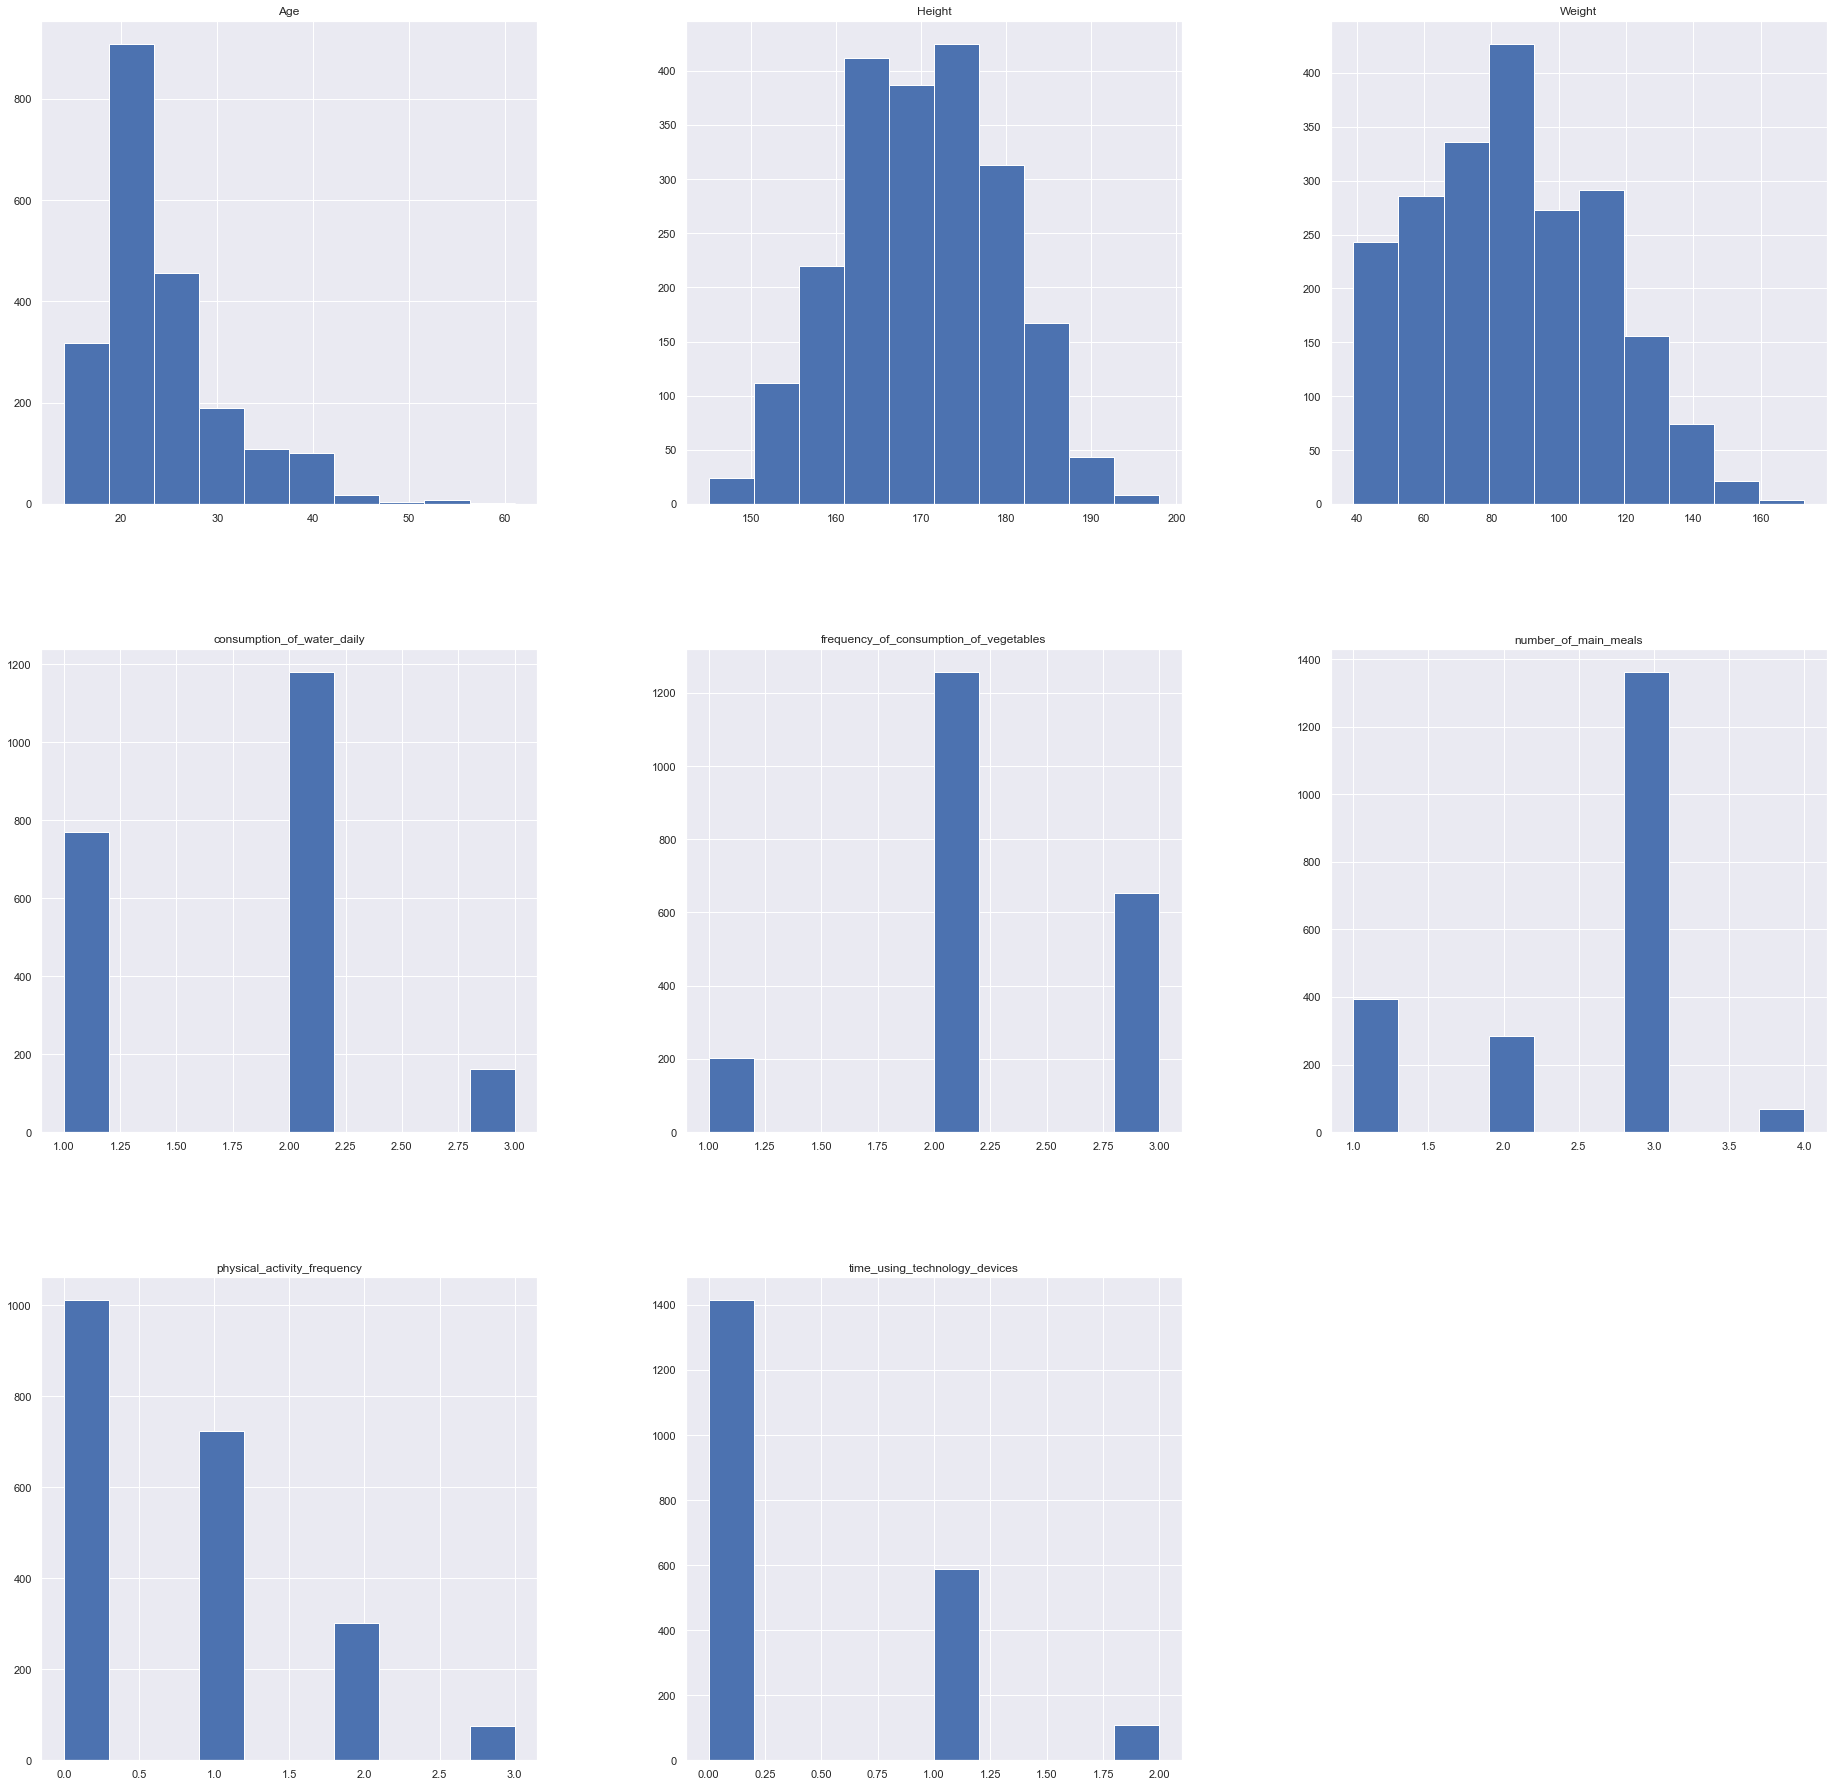

In [12]:
#Hist of Numerical Variables
#Based on the histogram we can say that we have only Age, Height, and Weight as numerical variables, and the rest of the variables are categorical
obesity_df.hist(figsize=(32,32))
plt.show()

In [13]:
#Obesity Level
temp = obesity_df.obesity_level.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Obesity Level",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "obesity level",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [14]:
#Transportation used
temp = obesity_df.transportation_used.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"What type of transportation was used?",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "transportation",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [15]:
#Consumption of alcohol
temp = obesity_df.consumption_of_alcohol.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Consumption of Alcohol",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "consumption of alcohol ",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [16]:
#Consumption of food between meals
temp = obesity_df.consumption_of_food_between_meals.value_counts()
fig = {
  "data": [
    {
      "values": temp.values,
      "labels": temp.index,
      "domain": {"x": [0, 1]},
      "hole": .6,
      "type": "pie"
    },
    
    ],
  "layout": {
        "title":"Consumption of food between meals",
        "annotations": [
            {
                "font": {
                    "size": 17
                },
                "showarrow": False,
                "text": "consumption of food",
                "x": 0.5,
                "y": 0.5
            }
            
        ]
    }
}
iplot(fig, filename='donut')

In [17]:
#Percentage of male/female patients
count_female = len(obesity_df[obesity_df.Gender == 'Female'])
count_male = len(obesity_df[obesity_df.Gender == 'Male'])
print("Percentage of Female Patients: {:.2f}%".format((count_female / (len(obesity_df.Gender))*100)))
print("Percentage of Male Patients: {:.2f}%".format((count_male / (len(obesity_df.Gender))*100)))

Percentage of Female Patients: 49.41%
Percentage of Male Patients: 50.59%


<AxesSubplot:xlabel='Gender', ylabel='Weight'>

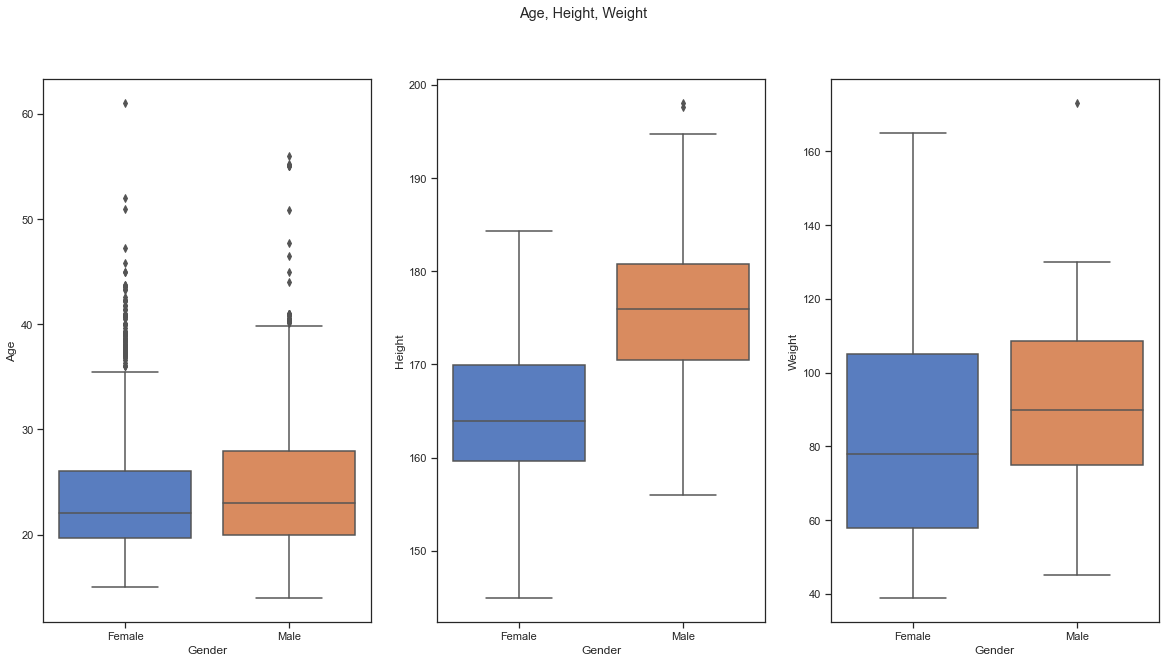

In [18]:
#Boxplot of the age,height,weight of male/female
fig = plt.figure(figsize=(20,10))
fig.suptitle('Age, Height, Weight')
sns.set(style="ticks", palette="muted")
plt.subplot(131)
sns.boxplot(x='Gender', y='Age', data=obesity_df)
plt.subplot(132)
sns.boxplot(x='Gender', y='Height', data=obesity_df)
plt.subplot(133)
sns.boxplot(x='Gender', y='Weight', data=obesity_df)

The first boxplot shows outliers for both genders starting from 35 years old and older. The second boxplot has two outliers for male gender starting from 195 height. The third boxplot has one outlier for male gender.

<AxesSubplot:xlabel='Age'>

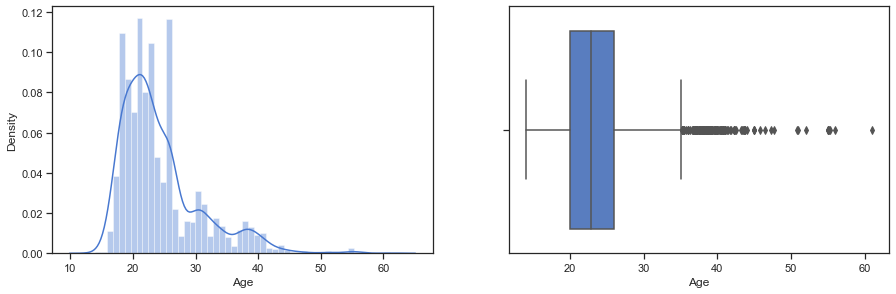

In [19]:
#Hist of age to check outliers
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(obesity_df['Age'])
plt.subplot(2,2,2)
sns.boxplot(obesity_df['Age'])

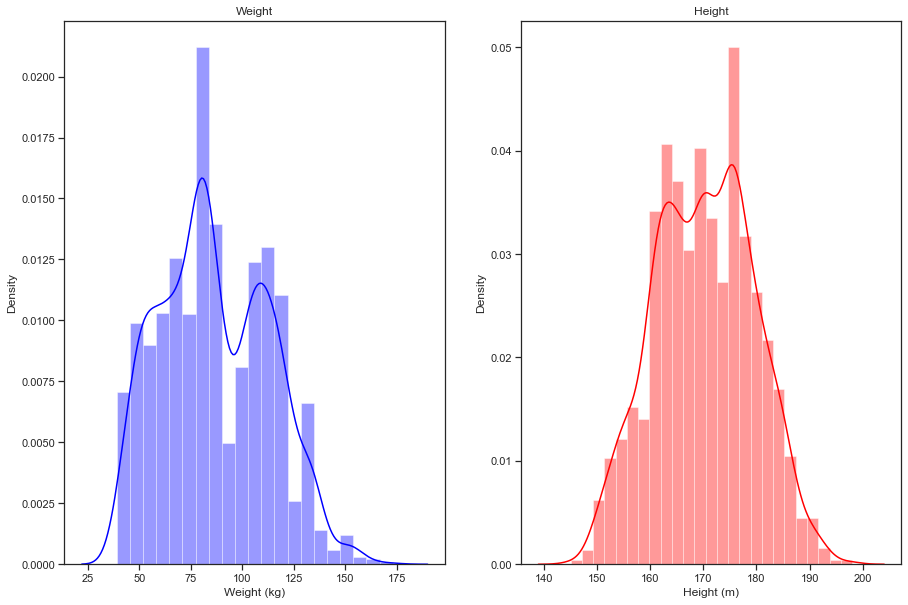

In [20]:
#Check the distribution of weight and height
plt.figure(figsize=(15,10))
plt.subplot(1, 2, 1)
sns.distplot(obesity_df["Weight"], color="blue").set_title('Weight')
plt.xlabel("Weight (kg)")
plt.subplot(1, 2, 2)
sns.distplot(obesity_df["Height"], color="red").set_title('Height')
plt.xlabel("Height (m)")
plt.show()

The weight variable is bimodal and has an average around 75-80kg. The height variable looks more like a normal curve and has an average around 170cm. Both variables are not skewed toward a side. From the previous boxplot we know we have a very small number of outliers for weight (one outlier) and height (two outliers) variables. Later we will look closer at outliers and will remove them.

<Figure size 1440x1080 with 0 Axes>

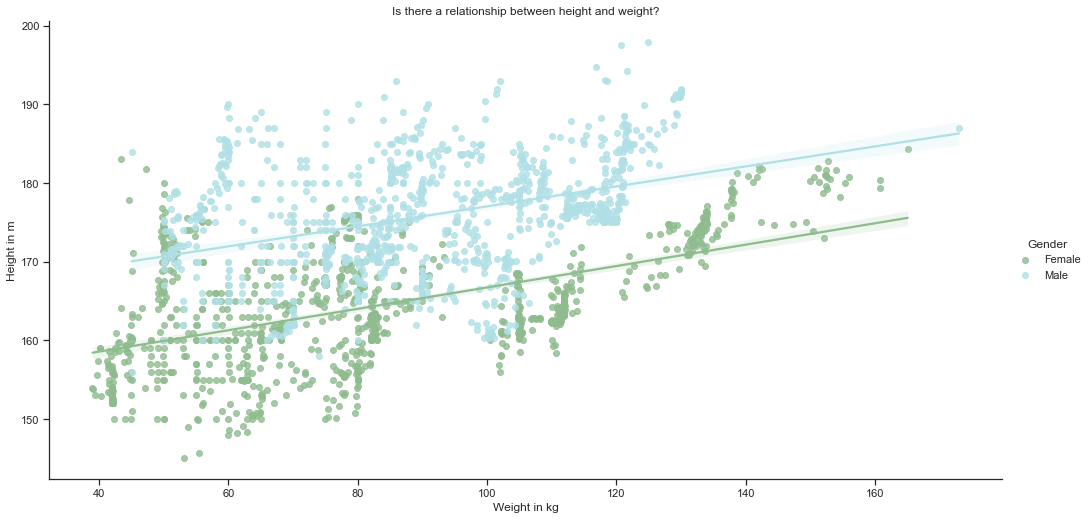

In [21]:
#Is there a relationship between height and weight variables?
plt.figure(figsize=(20,15))
sns.lmplot(x="Weight", y="Height", hue="Gender", data=obesity_df, palette=dict(Female="darkseagreen", Male="powderblue"),height=7, aspect=2, x_jitter=.1)
plt.title('Is there a relationship between height and weight?')
plt.xlabel("Weight in kg")
plt.ylabel("Height in m")
plt.show()

Body mass index (BMI) is an estimate of body fat based on height and weight. We wanted to look closer at their relationship for both genders. Based on the graph we can see that there is a relationship between weight and height. Datapoints for males are more clustered than datapoints for females. We can say that females datapoints have a wider range in terms of their weight. However, the regression line does not perfectly fit the data, we have a deviation of datapoints from the regression line. The regression line for females is a little bit steeper than the regression line for males. It means that the same increase in weight for females corresponds to a little bit larger increase in height. 

In [22]:
#Create new df and calculate BMI. The formula is BMI = kg/m2 
bmi_df = obesity_df.copy()
bmi_df['BMI'] = bmi_df['Weight']/(bmi_df['Height']**2)
bmi_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level,BMI
0,Female,21.00,162.00,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight,0.00
1,Female,21.00,152.00,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight,0.00
2,Male,23.00,180.00,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight,0.00
3,Male,27.00,180.00,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I,0.00
4,Male,22.00,178.00,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II,0.00


https://www.cdc.gov/healthyweight/assessing/bmi/adult_bmi/index.html

How is BMI interpreted for adults?
For adults 20 years old and older, BMI is interpreted using standard weight status categories. These categories are the same for men and women of all body types and ages.

The standard weight status categories associated with BMI ranges for adults are:
- Below 18.5	Underweight
- 18.5 – 24.9	Normal or Healthy Weight
- 25.0 – 29.9	Overweight
- 30.0 and Above	Obese

Text(0.5, 0, 'Obesity level')

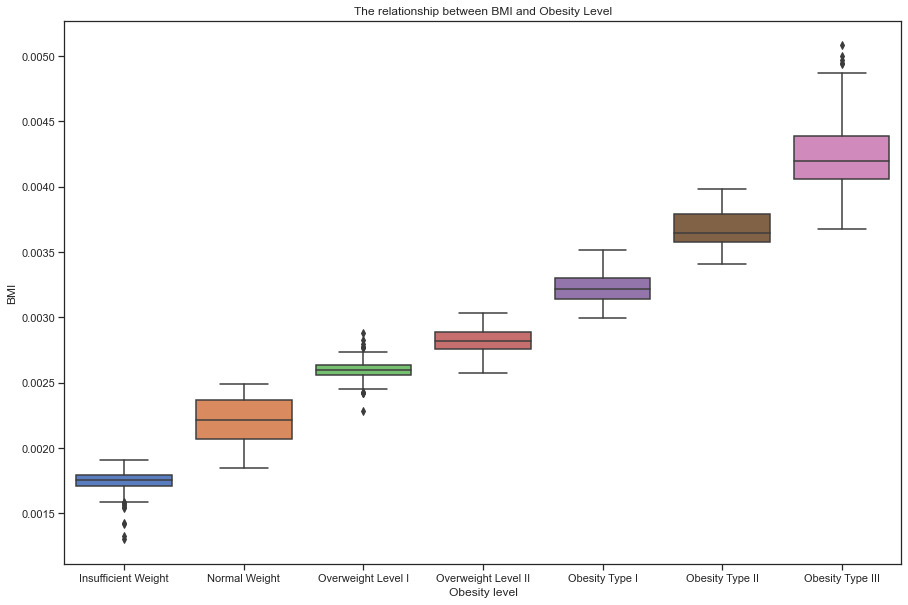

In [23]:
plt.figure(figsize=(15,10))
sns.boxplot(x = 'obesity_level', y = 'BMI',  
           order=['Insufficient Weight','Normal Weight','Overweight Level I','Overweight Level II', 'Obesity Type I', 'Obesity Type II', 'Obesity Type III'], 
           data = bmi_df).set_title('The relationship between BMI and Obesity Level')
plt.ylabel('BMI')
plt.xlabel('Obesity level')

The graph shows that there is a relationship between BMI and obesity. We can conclude that BMI was used to characterize obesity level. We do not have a lot of outliers which indicates that there is a strong correlation.

<AxesSubplot:xlabel='transportation_used', ylabel='BMI'>

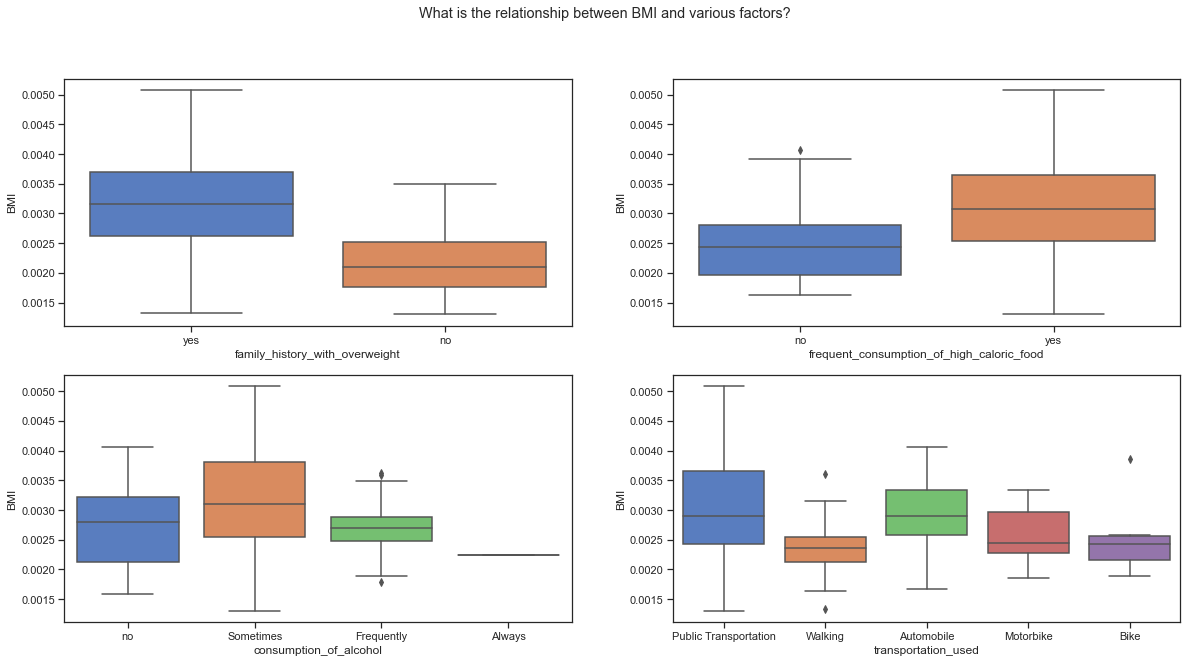

In [24]:
#Boxplot of the relationship between BMI and other variables
fig = plt.figure(figsize=(20,10))
fig.suptitle('What is the relationship between BMI and various factors?')
sns.set(style="ticks", palette="muted")
plt.subplot(2, 2, 1)
sns.boxplot(x='family_history_with_overweight', y='BMI', data=bmi_df)
plt.subplot(2, 2, 2)
sns.boxplot(x='frequent_consumption_of_high_caloric_food', y='BMI', data=bmi_df)
plt.subplot(2, 2, 3)
sns.boxplot(x='consumption_of_alcohol', y='BMI', data=bmi_df)
plt.subplot(2, 2, 4)
sns.boxplot(x='transportation_used', y='BMI', data=bmi_df)

The first boxplot shows that people who have a family history with overweight are in a high risk.
The second boxplot shows that people who consume high calories food are likely to have problems with overweight than those who do not consume high calories food.
The third boxplot of consumption of alcohol shows tha people who do not consume how much alcohol they drink are in a risk of overweight. Also, we can see that there was only one person who answered 'Always'. 
The last boxplot of transportation used shows that people who are usually using public transportation or car might be in a higher risk of overweigh than people who are walking and using bike.



Text(0.5, 1.0, 'Obesity Level based on Age for Male and Female')

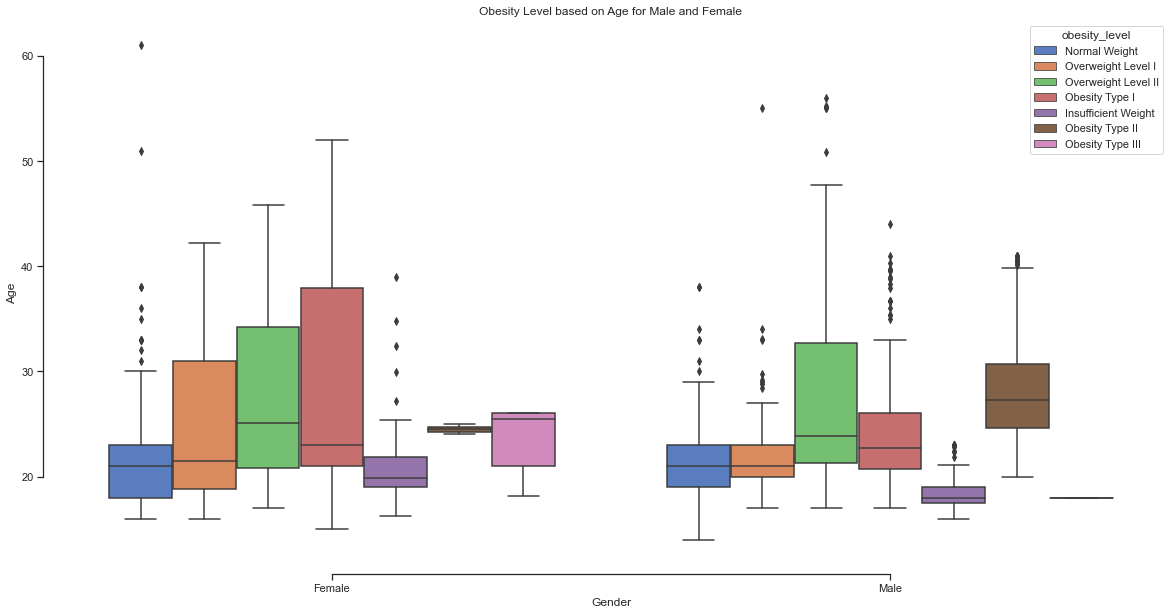

In [25]:
#Boxplot based on female/male, their age, and obesity level
fig = plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="muted")
sns.boxplot(x="Gender", y="Age", hue='obesity_level', data=obesity_df)
sns.despine(offset=10, trim=True)
plt.title('Obesity Level based on Age for Male and Female')

Younger people tend to have normal weight and overweight level I. Some of them also can ahve insufficient weight. Younger women tend to have obesity type III. For male gender we have only one person who have the obesity type III. Women tend to have an obesity more then men.
Based on the article 'Obesity and overweight populations in Latin America', 
the prevalence of overweight and obesity in Latin American children is remarkably high (16%). 24% women and 14.6% men have an obesity.
https://www.thelancet.com/campaigns/kidney/updates/obesity-and-overweight-populations-in-latin-america  

Text(0.5, 1.0, 'Obesity Level based on Weight (kg) for Male and Female')

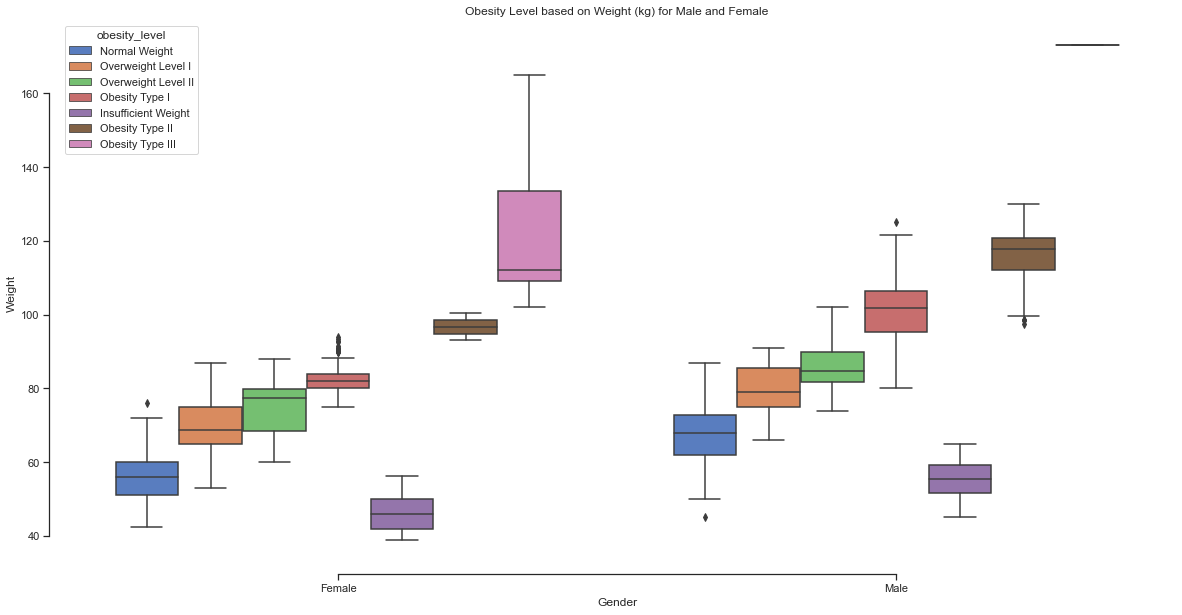

In [26]:
#Boxplot based on female/male, their weight, and obesity level
fig = plt.figure(figsize=(20,10))
sns.set(style="ticks", palette="muted")
sns.boxplot(x="Gender", y="Weight", hue='obesity_level', data=obesity_df)
sns.despine(offset=10, trim=True)
plt.title('Obesity Level based on Weight (kg) for Male and Female')

Weight is a factor of obesity for both genders. Women with overweight in a hight risk of obesity

**DATA PREPROCESSING**

In [27]:
#https://machinelearningmastery.com/how-to-use-statistics-to-identify-outliers-in-data/
#Remove Outliers for Height variable
df = obesity_df.copy()
q25 = df['Height'].quantile(0.25)
q75 = df['Height'].quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=163.000, 75th=176.846, IQR=13.846


In [28]:
# calculate the outlier cutoff
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr
print('Upper Limit: %.3f, Lowever Limit: %.3f' % (upper_limit, lower_limit))

Upper Limit: 197.616, Lowever Limit: 142.230


In [29]:
# identify outliers
df[df['Height'] > upper_limit]
df[df['Height'] < lower_limit]
# remove outliers
df = df[df['Height'] < upper_limit]

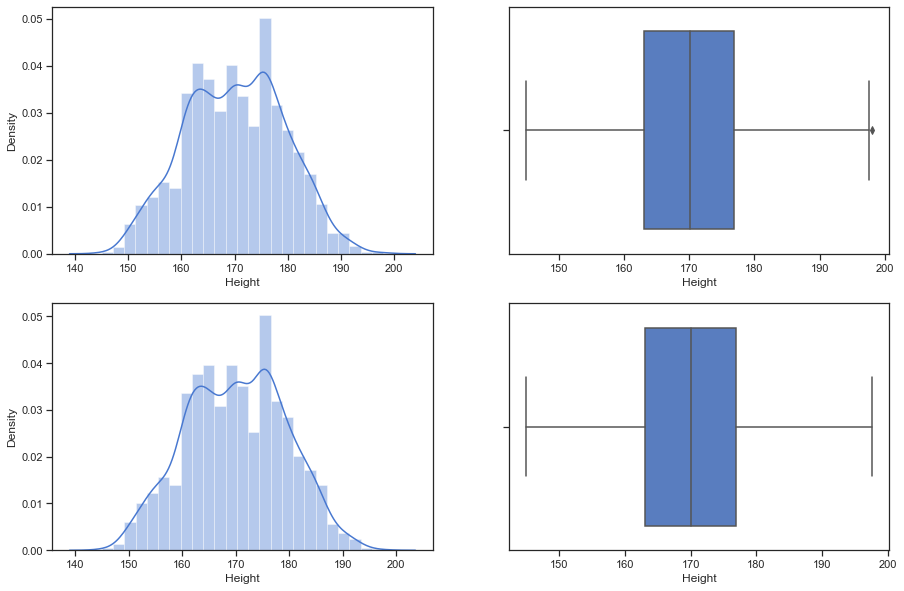

In [30]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(obesity_df['Height'])
plt.subplot(2,2,2)
sns.boxplot(obesity_df['Height'])
plt.subplot(2,2,3)
sns.distplot(df['Height'])
plt.subplot(2,2,4)
sns.boxplot(df['Height'])
plt.show()

In [31]:
#Remove Outliers for Weight variable
q25 = df['Weight'].quantile(0.25)
q75 = df['Weight'].quantile(0.75)
iqr = q75 - q25
print('Percentiles: 25th=%.3f, 75th=%.3f, IQR=%.3f' % (q25, q75, iqr))

Percentiles: 25th=65.449, 75th=107.339, IQR=41.890


In [32]:
# calculate the outlier cutoff
upper_limit = q75 + 1.5 * iqr
lower_limit = q25 - 1.5 * iqr
print('Upper Limit: %.3f, Lowever Limit: %.3f' % (upper_limit, lower_limit))

Upper Limit: 170.174, Lowever Limit: 2.613


In [33]:
# identify outliers
df[df['Weight'] > upper_limit]
df[df['Weight'] < lower_limit]
# remove outliers
df = df[df['Weight'] < upper_limit]

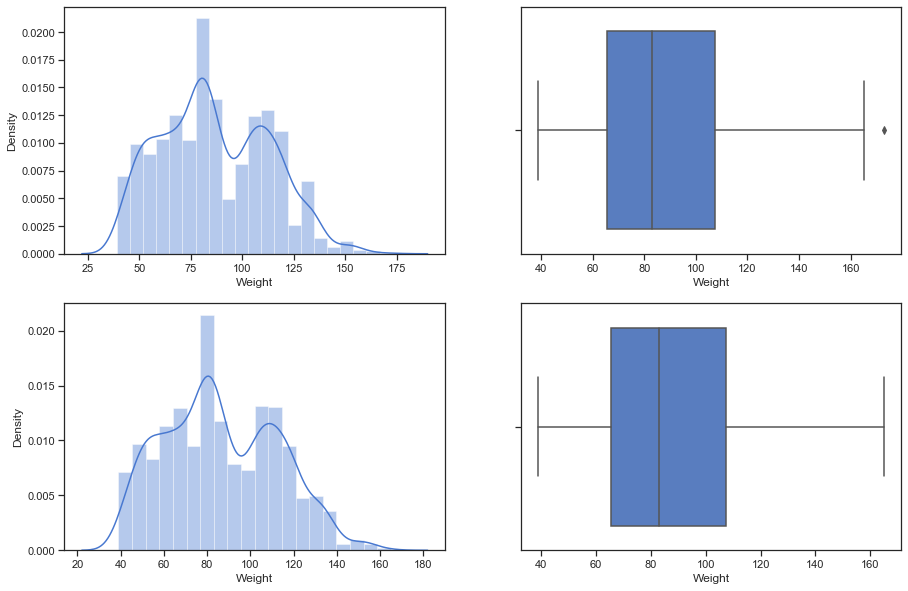

In [34]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(obesity_df['Weight'])
plt.subplot(2,2,2)
sns.boxplot(obesity_df['Weight'])
plt.subplot(2,2,3)
sns.distplot(df['Weight'])
plt.subplot(2,2,4)
sns.boxplot(df['Weight'])
plt.show()

In [35]:
#Calculate skewness for Age variable (Chapter 2 - Data Preprocessing)
mean = np.nanmean(df["Age"])
median = np.nanmedian(df["Age"])
std = np.nanstd(df["Age"])

skewness = (3 * (mean-median)) / std
print("Mean:", mean, " Median:", median, " Std:", std, " Skewness:", skewness)


Mean: 24.31763793598862  Median: 22.789402  Std: 6.345287195156644  Skewness: 0.7225374781247684


We know that if skewness is less than -1 or greater than 1, the distribution is highly skewed.If skewness is between -1 and -0.5 or between 0.5 and 1, the distribution is moderately skewed; if skewness is between -0.5 and 0.5, the distribution is approximately symmetric.

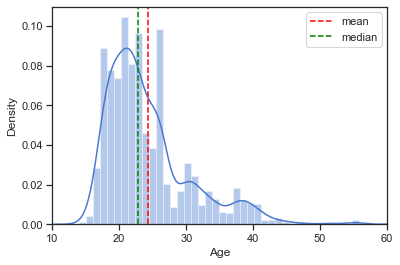

In [36]:
mean = mean
median = median
n_bins = np.sqrt(len(df["Age"]))
sns.distplot(df["Age"], bins= int(n_bins))
plt.xlim((10, 60))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()
plt.show()



For the Age variable we cannot just remove outliers because datapoints which look like outliers are important data. The survey was conducted for the groups of age between 14 and 61. Outliers which we have after the age 35-40 exist because fewer people in that age group completed the survey. To reduce skewness we can use transformation.

In [37]:
#Reduce skewness using square root transformation.
age_log = df.Age.apply(np.log)
mean = np.nanmean(age_log)
median = np.nanmedian(age_log)
std = np.nanstd(age_log)
skewness = (3*(mean-median)) / std
print(skewness)

0.45936568021847285


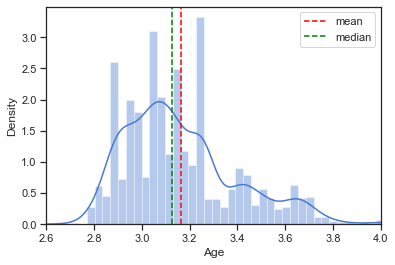

In [38]:
mean = np.nanmean(age_log)
median = np.nanmedian(age_log)
n_bins = np.sqrt(len(age_log))
sns.distplot(age_log, bins= int(n_bins))
plt.xlim((2.6, 4))
plt.axvline(mean, color = 'red', label = 'mean', linestyle = 'dashed')
plt.axvline(median, color = 'green', label = 'median', linestyle = 'dashed')
plt.legend()

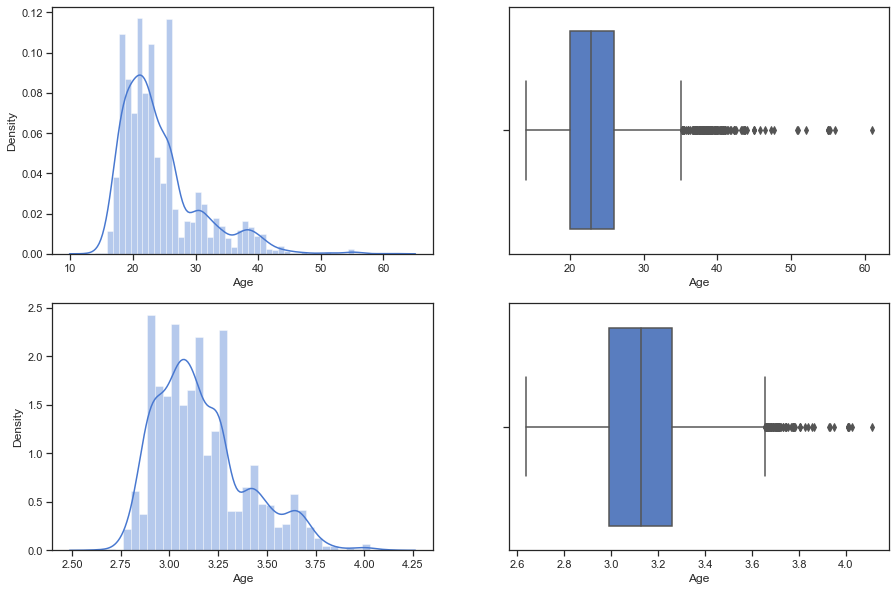

In [39]:
plt.figure(figsize=(15,10))
plt.subplot(2,2,1)
sns.distplot(obesity_df['Age'])
plt.subplot(2,2,2)
sns.boxplot(obesity_df['Age'])
plt.subplot(2,2,3)
sns.distplot(age_log)
plt.subplot(2,2,4)
sns.boxplot(age_log)
plt.show()

In [40]:
new_df = df.copy()

In [41]:
new_df[['Age']] = age_log
new_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,Female,3.04,162.00,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,3.04,152.00,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,3.14,180.00,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,3.30,180.00,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,3.09,178.00,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II


In [42]:
#Categorical Variables Transformation. One Hot Encoding, Ordinal Encoding, Label Encoding
#https://towardsdatascience.com/categorical-encoding-using-label-encoding-and-one-hot-encoder-911ef77fb5bd
#One Hot Encoding
new_df['Gender'] = new_df['Gender'].map({'Female': 1, 'Male': 0})
new_df['family_history_with_overweight'] = new_df['family_history_with_overweight'].map({'yes': 1, 'no': 0})
new_df['frequent_consumption_of_high_caloric_food'] = new_df['frequent_consumption_of_high_caloric_food'].map({'yes': 1, 'no': 0})
new_df['smoke'] = new_df['smoke'].map({'yes': 1, 'no': 0})
new_df['calories_consumption_monitoring'] = new_df['calories_consumption_monitoring'].map({'yes': 1, 'no': 0})

In [43]:
new_df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,1,3.04,162.00,64.00,1,0,2,3,Sometimes,0,2,0,0,1,no,Public Transportation,Normal Weight
1,1,3.04,152.00,56.00,1,0,3,3,Sometimes,1,3,1,3,0,Sometimes,Public Transportation,Normal Weight
2,0,3.14,180.00,77.00,1,0,2,3,Sometimes,0,2,0,2,1,Frequently,Public Transportation,Normal Weight
3,0,3.30,180.00,87.00,0,0,3,3,Sometimes,0,2,0,2,0,Frequently,Walking,Overweight Level I
4,0,3.09,178.00,89.80,0,0,2,1,Sometimes,0,2,0,0,0,Sometimes,Public Transportation,Overweight Level II


In [44]:
#Create df with only numerical variables
num_df = new_df.select_dtypes(include=['int32', 'int64','float'])
num_df = num_df.loc[~num_df.index.duplicated(keep='first')]
num_df

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices
0,1,3.04,162.00,64.00,1,0,2,3,0,2,0,0,1
1,1,3.04,152.00,56.00,1,0,3,3,1,3,1,3,0
2,0,3.14,180.00,77.00,1,0,2,3,0,2,0,2,1
3,0,3.30,180.00,87.00,0,0,3,3,0,2,0,2,0
4,0,3.09,178.00,89.80,0,0,2,1,0,2,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,1,3.04,171.07,131.41,1,1,3,3,0,1,0,1,0
2107,1,3.09,174.86,133.74,1,1,3,3,0,2,0,1,0
2108,1,3.11,175.22,133.69,1,1,3,3,0,2,0,1,0
2109,1,3.19,173.94,133.35,1,1,3,3,0,2,0,1,0


In [45]:
#Create df with categorical variables
obj_var = new_df.select_dtypes(include=[object])
obj_var.head()

,consumption_of_food_between_meals,consumption_of_alcohol,transportation_used,obesity_level
0,Sometimes,no,Public Transportation,Normal Weight
1,Sometimes,Sometimes,Public Transportation,Normal Weight
2,Sometimes,Frequently,Public Transportation,Normal Weight
3,Sometimes,Frequently,Walking,Overweight Level I
4,Sometimes,Sometimes,Public Transportation,Overweight Level II


In [46]:
#One Hot Encoding for the variable transportation_used
for i in obj_var['transportation_used'].unique():
    print (i)

Public Transportation
Walking
Automobile
Motorbike
Bike


In [47]:
obj_var= pd.get_dummies(obj_var, columns = ['transportation_used'], dtype=np.int64)
obj_var

,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
0,Sometimes,no,Normal Weight,0,0,0,1,0
1,Sometimes,Sometimes,Normal Weight,0,0,0,1,0
2,Sometimes,Frequently,Normal Weight,0,0,0,1,0
3,Sometimes,Frequently,Overweight Level I,0,0,0,0,1
4,Sometimes,Sometimes,Overweight Level II,0,0,0,1,0
...,...,...,...,...,...,...,...,...
2106,Sometimes,Sometimes,Obesity Type III,0,0,0,1,0
2107,Sometimes,Sometimes,Obesity Type III,0,0,0,1,0
2108,Sometimes,Sometimes,Obesity Type III,0,0,0,1,0
2109,Sometimes,Sometimes,Obesity Type III,0,0,0,1,0


In [48]:
#Ordinal Encoding for the variable consumption_of_food_between_meals
for i in obj_var['consumption_of_food_between_meals'].unique():
    print (i)

Sometimes
Frequently
Always
no


In [49]:
consumption_of_food_between_meals = ['Sometimes', 'Frequently', 'Always','no']

In [50]:
oe = OrdinalEncoder(categories=[consumption_of_food_between_meals])
obj_var[['consumption_of_food_between_meals']] = oe.fit_transform(obj_var[['consumption_of_food_between_meals']])
obj_var.consumption_of_food_between_meals = obj_var.consumption_of_food_between_meals.astype(int)
obj_var.head()

,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
0,0,no,Normal Weight,0,0,0,1,0
1,0,Sometimes,Normal Weight,0,0,0,1,0
2,0,Frequently,Normal Weight,0,0,0,1,0
3,0,Frequently,Overweight Level I,0,0,0,0,1
4,0,Sometimes,Overweight Level II,0,0,0,1,0


In [51]:
#Ordinal Encoding for the variable consumption_of_alcohol
for i in obj_var['consumption_of_alcohol'].unique():
    print (i)

no
Sometimes
Frequently
Always


In [52]:
consumption_of_alcohol = ['no', 'Sometimes', 'Frequently', 'Always']

In [53]:
oe = OrdinalEncoder(categories=[consumption_of_alcohol])
obj_var[['consumption_of_alcohol']] = oe.fit_transform(obj_var[['consumption_of_alcohol']])
obj_var.consumption_of_alcohol = obj_var.consumption_of_alcohol.astype(int)
obj_var.head()

,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
0,0,0,Normal Weight,0,0,0,1,0
1,0,1,Normal Weight,0,0,0,1,0
2,0,2,Normal Weight,0,0,0,1,0
3,0,2,Overweight Level I,0,0,0,0,1
4,0,1,Overweight Level II,0,0,0,1,0


In [54]:
#Label Encoding for the target variable obesity_level
obj_var['obesity_level'] = obj_var['obesity_level'].astype('category')
obj_var['obesity_level'] = obj_var['obesity_level'].cat.codes
obj_var.head()

,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
0,0,0,1,0,0,0,1,0
1,0,1,1,0,0,0,1,0
2,0,2,1,0,0,0,1,0
3,0,2,5,0,0,0,0,1
4,0,1,6,0,0,0,1,0


In [55]:
#Reoder obesity_level variable
first_column = df.pop('obesity_level')
df.insert(0, 'obesity_level', first_column)
df.head()

,obesity_level,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used
0,Normal Weight,Female,21.00,162.00,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation
1,Normal Weight,Female,21.00,152.00,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation
2,Normal Weight,Male,23.00,180.00,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation
3,Overweight Level I,Male,27.00,180.00,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking
4,Overweight Level II,Male,22.00,178.00,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation


In [56]:
df.shape

(2109, 17)

In [57]:
#Merge numerical df and categorical df
df = pd.concat([num_df, obj_var], axis=1, join='inner')
df.head()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,smoke,consumption_of_water_daily,...,physical_activity_frequency,time_using_technology_devices,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
0,1,3.04,162.00,64.00,1,0,2,3,0,2,...,0,1,0,0,1,0,0,0,1,0
1,1,3.04,152.00,56.00,1,0,3,3,1,3,...,3,0,0,1,1,0,0,0,1,0
2,0,3.14,180.00,77.00,1,0,2,3,0,2,...,2,1,0,2,1,0,0,0,1,0
3,0,3.30,180.00,87.00,0,0,3,3,0,2,...,2,0,0,2,5,0,0,0,0,1
4,0,3.09,178.00,89.80,0,0,2,1,0,2,...,0,0,0,1,6,0,0,0,1,0


In [58]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2109 entries, 0 to 2110
Data columns (total 21 columns):
 #   Column                                     Non-Null Count  Dtype  
---  ------                                     --------------  -----  
 0   Gender                                     2109 non-null   int64  
 1   Age                                        2109 non-null   float64
 2   Height                                     2109 non-null   float64
 3   Weight                                     2109 non-null   float64
 4   family_history_with_overweight             2109 non-null   int64  
 5   frequent_consumption_of_high_caloric_food  2109 non-null   int64  
 6   frequency_of_consumption_of_vegetables     2109 non-null   int32  
 7   number_of_main_meals                       2109 non-null   int32  
 8   smoke                                      2109 non-null   int64  
 9   consumption_of_water_daily                 2109 non-null   int32  
 10  calories_consumption_mon

In [59]:
#Check correlation
df.corr()

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,smoke,consumption_of_water_daily,...,physical_activity_frequency,time_using_technology_devices,consumption_of_food_between_meals,consumption_of_alcohol,obesity_level,transportation_used_Automobile,transportation_used_Bike,transportation_used_Motorbike,transportation_used_Public Transportation,transportation_used_Walking
Gender,1.00,-0.06,-0.62,-0.16,-0.10,-0.06,0.32,-0.02,-0.04,-0.19,...,-0.17,-0.07,0.01,0.01,-0.02,-0.14,-0.06,-0.05,0.16,-0.04
Age,-0.06,1.00,-0.01,0.25,0.23,0.07,-0.01,-0.07,0.09,-0.09,...,-0.19,-0.26,-0.13,0.07,0.26,0.58,0.00,0.02,-0.53,-0.08
Height,-0.62,-0.01,1.00,0.46,0.25,0.18,-0.07,0.21,0.06,0.19,...,0.23,-0.01,-0.14,0.13,0.04,0.08,0.03,-0.01,-0.09,0.04
Weight,-0.16,0.25,0.46,1.00,0.50,0.27,0.20,0.13,0.03,0.05,...,-0.16,-0.28,-0.33,0.21,0.39,-0.01,-0.02,-0.04,0.06,-0.10
family_history_with_overweight,-0.10,0.23,0.25,0.50,1.00,0.21,0.01,0.05,0.02,0.05,...,-0.13,-0.10,-0.32,-0.04,0.31,0.10,-0.02,-0.05,-0.06,-0.07
frequent_consumption_of_high_caloric_food,-0.06,0.07,0.18,0.27,0.21,1.00,-0.07,-0.02,-0.05,-0.08,...,-0.16,-0.06,-0.15,0.09,0.04,0.06,-0.08,-0.04,0.03,-0.18
frequency_of_consumption_of_vegetables,0.32,-0.01,-0.07,0.20,0.01,-0.07,1.00,0.14,0.03,0.04,...,0.02,-0.15,0.01,0.09,0.01,-0.10,-0.01,0.02,0.07,0.07
number_of_main_meals,-0.02,-0.07,0.21,0.13,0.05,-0.02,0.14,1.00,0.04,0.07,...,0.13,0.03,-0.04,0.12,-0.11,0.01,0.03,0.02,-0.03,0.04
smoke,-0.04,0.09,0.06,0.03,0.02,-0.05,0.03,0.04,1.00,0.01,...,0.02,0.06,0.04,0.08,-0.02,0.01,-0.01,0.04,-0.02,0.02
consumption_of_water_daily,-0.19,-0.09,0.19,0.05,0.05,-0.08,0.04,0.07,0.01,1.00,...,0.27,0.09,0.16,0.04,0.02,-0.04,0.06,0.03,-0.01,0.09


Text(0.5, 1.0, 'Correlation Heatmap')

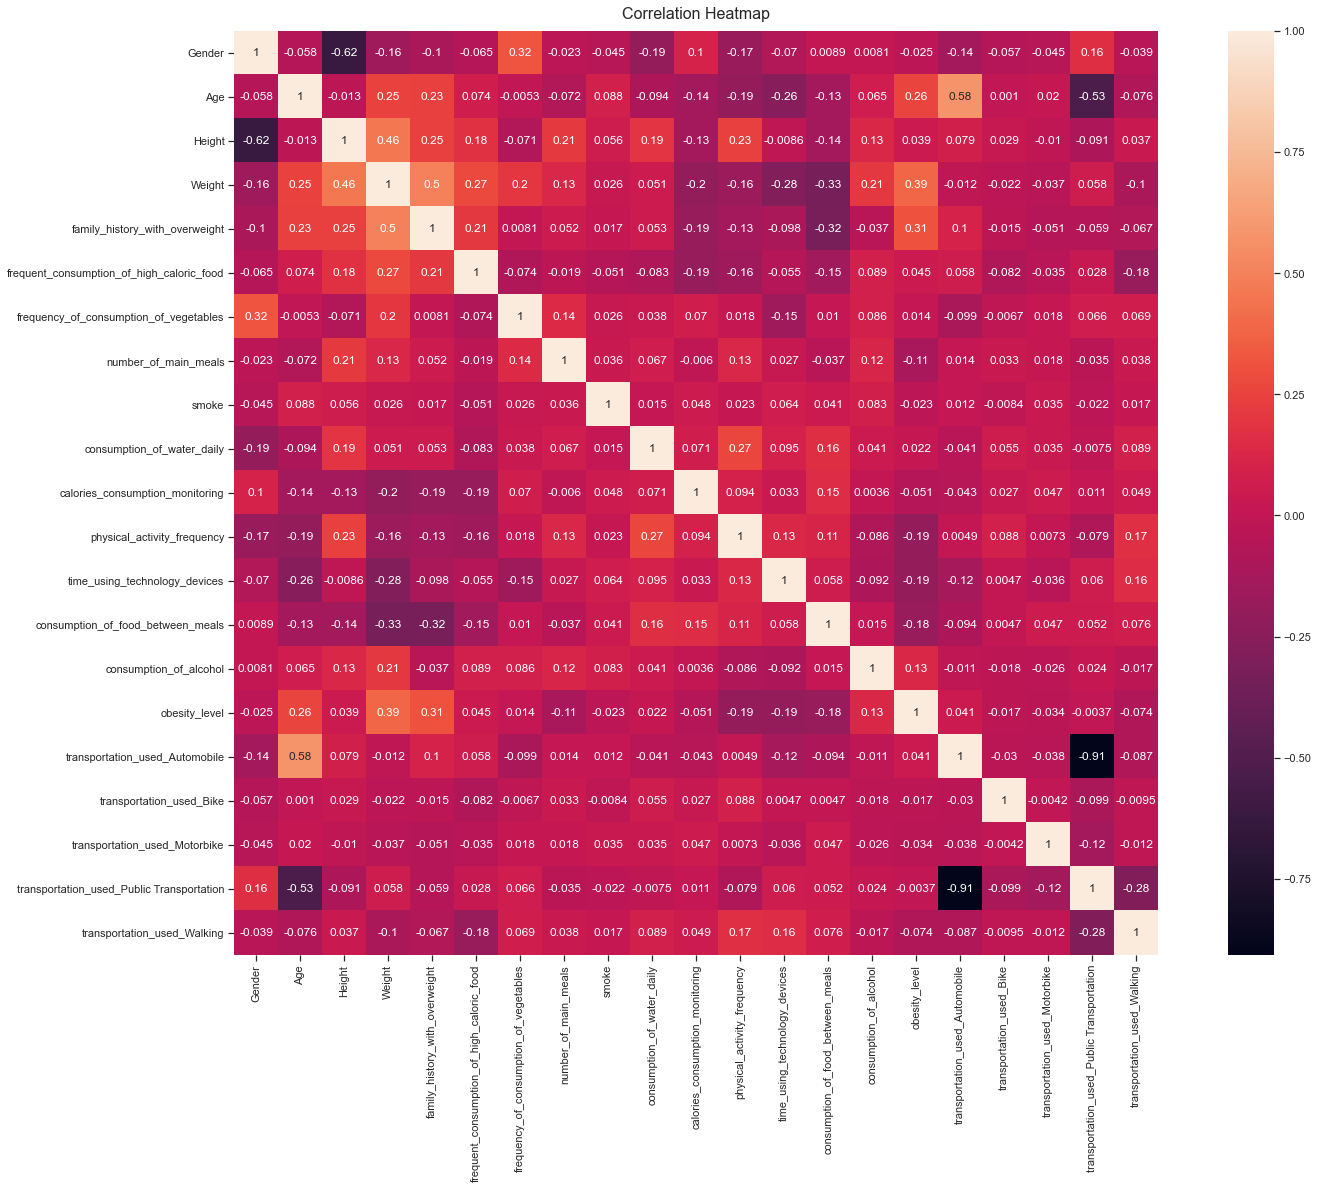

In [60]:
#Correlation heatmap
plt.figure(figsize=(25,17))
sns.heatmap(df.corr(), annot=True, square=True) 
plt.title('Correlation Heatmap', fontdict={'fontsize':16}, pad=12)

The correlation heatmap shows the pairwise correlation between all the variables. From the correlation matrix we can see that some variables are correlated to each other. 
The variables age and transportation_used_automobile have correlation in positive direction which might indicate that age and transportation_used_automobile have relationship.
Negative correlation between gender and height might indicate strong relationship.
High negative correlation between transportation_used_automobile and transportation_used_public shows that people who have car are not using public transportation.
Correlation between independent variables can cause multicollinearity. Highly correlated independent variables might create an overfiting of the model. Later we will look closer at variables. Any change in one highly correlated variable would casue change to another. That's why we cannot just remove all highly correlated variables without further analysis.
Looking at correlation heatmap we expected to see high correlation between weight/height and obesity level because the obesity_level represents BMI of weight and height, however, we do not see any correlation between these variables.

In [61]:
#Using VIF to check multicollinearity. 
#Compute VIF data for each independent variable
vif = pd.DataFrame()
vif['Features'] = df.columns
vif['VIF'] = [variance_inflation_factor(df.values, i) for i in range(df.shape[1])]
vif

,Features,VIF
0,Gender,1.99
1,Age,2.01
2,Height,2.55
3,Weight,2.54
4,family_history_with_overweight,1.52
5,frequent_consumption_of_high_caloric_food,1.21
6,frequency_of_consumption_of_vegetables,1.31
7,number_of_main_meals,1.14
8,smoke,1.05
9,consumption_of_water_daily,1.19


Variance Inflation Factor(VIF) is a measure of multicollinearity in the set of multiple regression variables. If the VIF value is higher than 10 it shows a high correlation with other independent variables.We have transportation variables which have high VIF. This shows a perfect correlation between these independent variables. 
There are couple methods how to deal with multicollinearity: 
- we can drop each feature individually and see how results will change (we can do it after we will look at feature importance)
- we can linearly combine the independent variables
- we can perform principal components analysis for hightly correlated variables
- we can use LASSO and Ridge regression which are advanced forms of regression analysis that can handle multicollinearity


**DATA MODELING**

LazyClassifier, kNN, Decision Trees, Random Forest, Bagging

In [62]:
#LazyClassifier
#We will use obesity_df because the following method does not require data preprocessing
obesity_model = obesity_df.copy()
X = obesity_model.drop(['obesity_level'],axis=1)
y = obesity_model['obesity_level']

In [63]:
#Split data into test/train
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)
print('dim(X_train) = ', X_train.shape)
print('dim(y_train) = ', y_train.shape)
print('dim(X_test) = ', X_test.shape)
print('dim(y_test) = ', y_test.shape)

dim(X_train) =  (1414, 16)
dim(y_train) =  (1414,)
dim(X_test) =  (697, 16)
dim(y_test) =  (697,)


In [64]:
#We can use LazyClassifier to get information of each model and its performance.
# The library automatically applies preprocessing to the dataset. It imputes missing values using SimpleImputer. Then, it uses StandardScaler for numeric features and either OneHotEncoder or OrdinalEncoder for the categorical features
#https://towardsdatascience.com/lazy-predict-fit-and-evaluate-all-the-models-from-scikit-learn-with-a-single-line-of-code-7fe510c7281
clf = LazyClassifier(predictions=True,verbose=0,ignore_warnings=True, custom_metric=None)
models, predictions = clf.fit(X_train, X_test,y_train, y_test)
model_dictionary = clf.provide_models(X_train, X_test,y_train, y_test)
models


100%|██████████████████████████████████████████████████████████████████████████████████| 29/29 [00:18<00:00,  1.59it/s]


,Accuracy,Balanced Accuracy,ROC AUC,F1 Score,Time Taken
Model,,,,,
LGBMClassifier,0.96,0.96,None,0.96,1.59
XGBClassifier,0.95,0.95,None,0.95,1.49
RandomForestClassifier,0.93,0.93,None,0.93,0.99
BaggingClassifier,0.93,0.93,None,0.93,0.24
ExtraTreesClassifier,0.92,0.92,None,0.92,0.83
DecisionTreeClassifier,0.91,0.91,None,0.91,0.11
SVC,0.90,0.90,None,0.90,0.64
NuSVC,0.89,0.88,None,0.89,1.17
LinearDiscriminantAnalysis,0.88,0.88,None,0.88,0.14


In [65]:
#KNN requires scaling of data because KNN uses the Euclidean distance between two data points to find nearest neighbors. 
#All distance based algorithms are affected by the scale of the variables, and that's we need to use StandardScaler.
knn_model = df.copy()
X = knn_model.drop(['obesity_level'],axis=1)
y = knn_model['obesity_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42)

In [66]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [67]:
import sklearn.metrics as metrics
k_range = range(1, 30)
scores = []
for k in k_range:
    knn = KNeighborsClassifier(n_neighbors=k)
    knn.fit(X_train, y_train)
    y_pred = knn.predict(X_test)
    scores.append(metrics.accuracy_score(y_test, y_pred))
print(scores)

[0.8175287356321839, 0.8031609195402298, 0.7974137931034483, 0.7758620689655172, 0.7729885057471264, 0.7686781609195402, 0.7701149425287356, 0.771551724137931, 0.7672413793103449, 0.764367816091954, 0.7543103448275862, 0.7456896551724138, 0.7471264367816092, 0.7413793103448276, 0.7298850574712644, 0.7313218390804598, 0.7298850574712644, 0.7155172413793104, 0.7169540229885057, 0.7126436781609196, 0.7126436781609196, 0.7198275862068966, 0.7083333333333334, 0.7126436781609196, 0.7068965517241379, 0.7097701149425287, 0.7011494252873564, 0.7025862068965517, 0.7025862068965517]


Text(0, 0.5, 'Testing Accuracy')

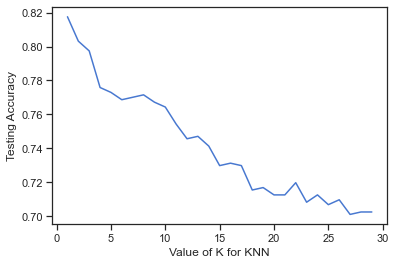

In [68]:
plt.plot(k_range, scores)
plt.xlabel('Value of K for KNN')
plt.ylabel('Testing Accuracy')

In [69]:
#Some algorithms do not require feature scaling. We will use DecisionTreeClassifier, RandomForest, and BaggingClassifier (ensemble algorithm)
model_df = df.copy()
X = model_df.drop(['obesity_level'],axis=1)
y = model_df['obesity_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True, stratify = y)

In [70]:
#RandomForest
rfc = RandomForestClassifier(n_estimators=300,random_state=42)
rfc.fit(X_train, y_train)
y_pred_rfc = rfc.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, y_pred_rfc)
print('Accuracy of RandomForest: ', accuracy)
#Cross-Validation
cv_rfc = cross_val_score(rfc, X,y, scoring='accuracy', cv=5)
print('CrossValidation: ', cv_rfc.mean())

Accuracy of RandomForest:  0.9267241379310345
CrossValidation:  0.9265324042282537


In [71]:
#RandomForest classification report
print('RandomForest Report:\n')
print((classification_report(y_test, y_pred_rfc)))

RandomForest Report:

              precision    recall  f1-score   support

           0       1.00      0.93      0.97        90
           1       0.76      0.86      0.81        95
           2       0.97      0.98      0.98       115
           3       1.00      0.98      0.99        98
           4       0.99      1.00      1.00       106
           5       0.84      0.83      0.84        96
           6       0.93      0.88      0.90        96

    accuracy                           0.93       696
   macro avg       0.93      0.92      0.93       696
weighted avg       0.93      0.93      0.93       696



- 0: 'Insufficient Weight'
- 1: 'Normal Weight'
- 2: 'Obesity Type I'
- 3: 'Obesity Type II'
- 4: 'Obesity Type III'
- 5: 'Overweight Level I'
- 6: 'Overweight Level II'

<Figure size 2160x2160 with 0 Axes>

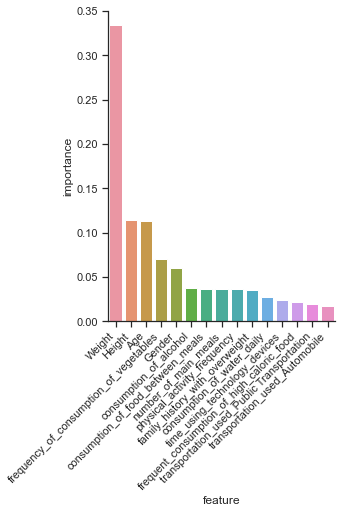

<Figure size 2160x2160 with 0 Axes>

In [72]:
#Feature importancies
importances = rfc.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:15]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.figure(figsize=(30,30))

In [73]:
#Decision Tree Classifier
dtc = DecisionTreeClassifier(max_depth = 12, random_state = 42)
dtc.fit(X_train, y_train)
y_pred_dfc = dtc.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, y_pred_dfc)
print('Accuracy of DecisionTree: ', accuracy)
#Cross-Validation
cv_dtc = cross_val_score(dtc, X,y, scoring='accuracy', cv=5)
print('CrossValidation: ', cv_dtc.mean())

Accuracy of DecisionTree:  0.9152298850574713
CrossValidation:  0.9269928290799383


In [74]:
#DecisionTree classification report
print('DecisionTree Report:\n')
print((classification_report(y_test, y_pred_dfc)))

DecisionTree Report:

              precision    recall  f1-score   support

           0       0.91      0.89      0.90        90
           1       0.81      0.80      0.80        95
           2       0.90      0.97      0.94       115
           3       0.99      0.93      0.96        98
           4       0.99      1.00      1.00       106
           5       0.87      0.86      0.87        96
           6       0.93      0.93      0.93        96

    accuracy                           0.92       696
   macro avg       0.91      0.91      0.91       696
weighted avg       0.92      0.92      0.92       696



- 0: 'Insufficient Weight'
- 1: 'Normal Weight'
- 2: 'Obesity Type I'
- 3: 'Obesity Type II'
- 4: 'Obesity Type III'
- 5: 'Overweight Level I'
- 6: 'Overweight Level II'

<Figure size 2160x2160 with 0 Axes>

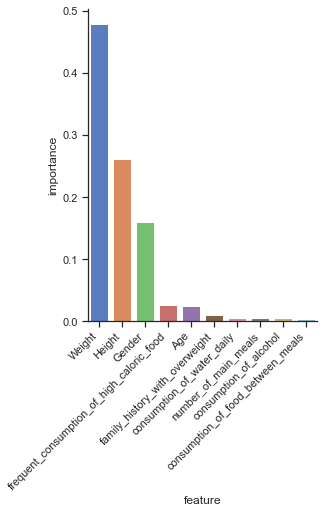

<Figure size 2160x2160 with 0 Axes>

In [75]:
#Feature importancies
importances = dtc.feature_importances_
feat_names = X_train.columns
tree_result = pd.DataFrame({'feature': feat_names, 'importance': importances})
tree_result_sort = tree_result.sort_values(by='importance',ascending=False)[:10]
chart = sns.catplot(x='feature', y='importance', kind='bar', data=tree_result_sort)
chart.set_xticklabels(rotation=45, horizontalalignment='right')
plt.figure(figsize=(30,30))

In [76]:
#BaggingClassifier. Bagging is fitting many decision trees on different samples of the dataset and averaging the predictions.
base_cls = DecisionTreeClassifier()
model = BaggingClassifier(base_estimator = base_cls,
                          n_estimators = 500,
                          random_state = 42)
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
#Accuracy
accuracy = accuracy_score(y_test, y_pred)
print('Accuracy of BaggingClassifier: ', accuracy)
#Cross-Validation
cv_bagging = cross_val_score(model, X,y, scoring='accuracy', cv=10)
print('CrossValidation: ', cv_bagging.mean())

Accuracy of BaggingClassifier:  0.9540229885057471
CrossValidation:  0.9544978560144436


In [77]:
#Bagging classification report
print('Bagging Classification Report:\n')
print((classification_report(y_test, y_pred)))

Bagging Classification Report:

              precision    recall  f1-score   support

           0       0.96      0.94      0.95        90
           1       0.92      0.94      0.93        95
           2       0.92      0.98      0.95       115
           3       0.99      0.95      0.97        98
           4       0.99      1.00      1.00       106
           5       0.98      0.92      0.95        96
           6       0.94      0.94      0.94        96

    accuracy                           0.95       696
   macro avg       0.96      0.95      0.95       696
weighted avg       0.95      0.95      0.95       696



- 0: 'Insufficient Weight'
- 1: 'Normal Weight'
- 2: 'Obesity Type I'
- 3: 'Obesity Type II'
- 4: 'Obesity Type III'
- 5: 'Overweight Level I'
- 6: 'Overweight Level II'

**Building Machine Learning Pipeline**

In [78]:
#https://machinelearningmastery.com/machine-learning-modeling-pipelines/
#https://towardsdatascience.com/a-simple-example-of-pipeline-in-machine-learning-with-scikit-learn-e726ffbb6976
#To build pipeline we will use the original dataset
model_df = obesity_df.copy()
model_df

,Gender,Age,Height,Weight,family_history_with_overweight,frequent_consumption_of_high_caloric_food,frequency_of_consumption_of_vegetables,number_of_main_meals,consumption_of_food_between_meals,smoke,consumption_of_water_daily,calories_consumption_monitoring,physical_activity_frequency,time_using_technology_devices,consumption_of_alcohol,transportation_used,obesity_level
0,Female,21.00,162.00,64.00,yes,no,2,3,Sometimes,no,2,no,0,1,no,Public Transportation,Normal Weight
1,Female,21.00,152.00,56.00,yes,no,3,3,Sometimes,yes,3,yes,3,0,Sometimes,Public Transportation,Normal Weight
2,Male,23.00,180.00,77.00,yes,no,2,3,Sometimes,no,2,no,2,1,Frequently,Public Transportation,Normal Weight
3,Male,27.00,180.00,87.00,no,no,3,3,Sometimes,no,2,no,2,0,Frequently,Walking,Overweight Level I
4,Male,22.00,178.00,89.80,no,no,2,1,Sometimes,no,2,no,0,0,Sometimes,Public Transportation,Overweight Level II
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2106,Female,20.98,171.07,131.41,yes,yes,3,3,Sometimes,no,1,no,1,0,Sometimes,Public Transportation,Obesity Type III
2107,Female,21.98,174.86,133.74,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public Transportation,Obesity Type III
2108,Female,22.52,175.22,133.69,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public Transportation,Obesity Type III
2109,Female,24.36,173.94,133.35,yes,yes,3,3,Sometimes,no,2,no,1,0,Sometimes,Public Transportation,Obesity Type III


In [79]:
#Split the dataset into traning and testing data
X = model_df.drop(['obesity_level'],axis=1)
y = model_df['obesity_level']
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.33, random_state=42, shuffle = True, stratify = y)

In [80]:
#https://medium.com/analytics-vidhya/how-to-apply-preprocessing-steps-in-a-pipeline-only-to-specific-features-4e91fe45dfb8
#https://www.analyticsvidhya.com/blog/2020/01/build-your-first-machine-learning-pipeline-using-scikit-learn/
#All preprocessing steps will be fitted to the pipeline
#Building transformer for categorical features
#Label Encoding for target variable
label_encoding = LabelEncoder()
y_train = label_encoding.fit_transform(y_train)
y_test = label_encoding.fit_transform(y_test)
#OneHot Encoding
one_hot_features = ['Gender', 'family_history_with_overweight', 'frequent_consumption_of_high_caloric_food', 'smoke', 'calories_consumption_monitoring', 'transportation_used']
one_hot_transformer = Pipeline(steps=[
                                      ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                                      ('onehot', OneHotEncoder())
                                      ])
#Ordinary Encoding
ordinary_features = ['consumption_of_food_between_meals', 'consumption_of_alcohol']
ordinary_transformer = Pipeline(steps=[
                                       ('imputer_cat', SimpleImputer(strategy = 'constant', fill_value = 'missing')),
                                       ('ordinal', OrdinalEncoder())
                                       ])
#Building transformer for numerical features
#We will use StandardScaler for normalization of numerical variables
numeric_features = ['Age', 'Height', 'Weight']
numeric_transformer = Pipeline(steps=[
                                      ('imputer_num', SimpleImputer(strategy = 'median')),
                                      ('scaler', StandardScaler())
                                      ])

#Combine all preprocessing steps into column transformer
preprocessor = ColumnTransformer(transformers=[
                                              ('OneHot', one_hot_transformer, one_hot_features),
                                              ('Ordinary', ordinary_transformer, ordinary_features),
                                              ('Scaled', numeric_transformer, numeric_features)
                                              ],remainder = 'passthrough')
build_pipeline = Pipeline(steps=[('ColumnTransform', preprocessor)])
#Fit to x_train and y_train
build_pipeline.fit(X_train, y_train)

Pipeline(steps=[('ColumnTransform',
                 ColumnTransformer(remainder='passthrough',
                                   transformers=[('OneHot',
                                                  Pipeline(steps=[('imputer_cat',
                                                                   SimpleImputer(fill_value='missing',
                                                                                 strategy='constant')),
                                                                  ('onehot',
                                                                   OneHotEncoder())]),
                                                  ['Gender',
                                                   'family_history_with_overweight',
                                                   'frequent_consumption_of_high_caloric_food',
                                                   'smoke',
                                                   'calories_consumption_monitoring',
   

In [81]:
#Create classes for label encoding to get names of obesity level
obesity_level = dict(zip(label_encoding.transform(label_encoding.classes_), label_encoding.classes_))

In [82]:
#credit card jupyternotebook h/w
#Model Selection
classifiers = [
    KNeighborsClassifier(n_neighbors = 5),
    DecisionTreeClassifier(),
    RandomForestClassifier(),
    XGBClassifier(),
    BaggingClassifier(base_estimator = DecisionTreeClassifier(), n_estimators = 500),
    GradientBoostingClassifier(),
    SGDClassifier()
    ]
top_class = []

for classifier in classifiers:
    pipe = Pipeline(steps=[('ColumnTransform', preprocessor),
                           ('classifier', classifier)])
    
    # training model
    pipe.fit(X_train, y_train)   
    print(classifier)
    
    acc_score = pipe.score(X_test, y_test)
    print("model score: %.3f" % acc_score)
    
    # using the model to predict
    y_pred = pipe.predict(X_test)
    
    #Assign obesity_level which we defined early
    obesity_level_get_names = [obesity_level[i] for i in obesity_level]
    print(classification_report(y_test, y_pred, target_names=obesity_level_get_names))


KNeighborsClassifier()
model score: 0.821
                     precision    recall  f1-score   support

Insufficient Weight       0.75      0.93      0.83        90
      Normal Weight       0.65      0.49      0.56        95
     Obesity Type I       0.81      0.90      0.85       116
    Obesity Type II       0.92      0.98      0.95        98
   Obesity Type III       1.00      1.00      1.00       107
 Overweight Level I       0.75      0.72      0.73        96
Overweight Level II       0.80      0.68      0.74        95

           accuracy                           0.82       697
          macro avg       0.81      0.82      0.81       697
       weighted avg       0.82      0.82      0.81       697

DecisionTreeClassifier()
model score: 0.914
                     precision    recall  f1-score   support

Insufficient Weight       0.98      0.93      0.95        90
      Normal Weight       0.84      0.87      0.86        95
     Obesity Type I       0.88      0.94      0.91      